# Gamma Function for $p(E)$

In [1]:
# imports
from importlib import reload
import numpy as np
from scipy import special
import seaborn as sns
import mpmath
from matplotlib import pyplot as plt

from zdm import zdm

# Simple evaluation

## $p(E>E_{\rm th})$

In [13]:
lEmin = 30.
lEmax = 42.
gamma = -1.16 
Emin = 10**lEmin

In [3]:
lEvals = np.linspace(lEmin, lEmax+3, 100)

In [4]:
p_E_Eth = special.gammaincc(gamma, 10**(Evals-lEmax)) / special.gammaincc(gamma, 10**(lEmin-lEmax))

NameError: name 'Evals' is not defined

## Plot

In [5]:
norm = mpmath.gammainc(gamma, a=10.**(lEmin-lEmax))
float(norm)

71703773370405.95

In [6]:
numer = np.array([float(mpmath.gammainc(gamma, a=10.**(lEval-lEmax))) for lEval in lEvals])

In [7]:
p_E_Eth = numer / float(norm)

In [8]:
ok = p_E_Eth > 0.

<AxesSubplot:>

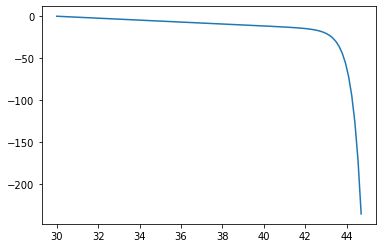

In [9]:
sns.lineplot(x=lEvals[ok], y=np.log10(p_E_Eth[ok]))

In [47]:
p_E_Eth

array([1.00000000e+000, 6.67179086e-001, 4.45127933e-001, 2.96980048e-001,
       1.98138877e-001, 1.32194115e-001, 8.81971488e-002, 5.88432931e-002,
       3.92590145e-002, 2.61927934e-002, 1.74752840e-002, 1.16591440e-002,
       7.77873705e-003, 5.18981067e-003, 3.46253314e-003, 2.31012970e-003,
       1.54127022e-003, 1.02830326e-003, 6.86062426e-004, 4.57726502e-004,
       3.05385549e-004, 2.03746851e-004, 1.35935637e-004, 9.06934136e-005,
       6.05087483e-005, 4.03701709e-005, 2.69341332e-005, 1.79698900e-005,
       1.19891343e-005, 7.99889930e-006, 5.33669796e-006, 3.56053292e-006,
       2.37551277e-006, 1.58489213e-006, 1.05740659e-006, 7.05479288e-007,
       4.70680768e-007, 3.14028122e-007, 2.09512768e-007, 1.39782323e-007,
       9.32596416e-008, 6.22206940e-008, 4.15121691e-008, 2.76958854e-008,
       1.84779605e-008, 1.23279636e-008, 8.22482379e-009, 5.48730358e-009,
       3.66089576e-009, 2.44236261e-009, 1.62939030e-009, 1.08699929e-009,
       7.25134077e-010, 4

## If this is too slow, we can use the recurrence relations + scipy

----

# Testing

In [69]:
Erand = np.random.uniform(size=20, low=39., high=42.)

In [70]:
Erand

array([39.11789784, 39.29858601, 39.81343426, 41.25465453, 41.80920106,
       39.82369355, 41.14204091, 40.73041224, 40.94387669, 40.31473306,
       40.0329512 , 40.83123824, 40.01546378, 39.90560488, 39.1270201 ,
       40.60141623, 39.88830789, 39.87793268, 40.90425401, 41.05667958])

In [71]:
lEmin = 30.

## Emax = 42.

In [72]:
reload(zdm)
p_E_42 = zdm.vector_diff_gamma(10**Erand, 10**lEmin, 10**42., gamma)
p_E_42

array([2.34007029e-50, 9.52025319e-51, 7.32172943e-52, 4.74615969e-55,
       1.89101512e-56, 6.95642437e-52, 8.65800660e-55, 7.30167350e-54,
       2.44072981e-54, 5.96582145e-53, 2.44679800e-52, 4.36051358e-54,
       2.67027416e-52, 4.62228719e-52, 2.23621072e-50, 1.40621875e-53,
       5.03912181e-52, 5.30694496e-52, 2.99524616e-54, 1.35689484e-54])

## Emax = 44.

In [73]:
p_E_44 = zdm.vector_diff_gamma(10**Erand, 10**lEmin, 10**44., gamma)

In [74]:
p_E_44

array([2.34311149e-50, 9.53901597e-51, 7.36905359e-52, 5.67052904e-55,
       3.57919052e-56, 7.00246572e-52, 9.93224237e-55, 7.70076910e-54,
       2.66258012e-54, 6.08898534e-53, 2.47307076e-52, 4.66325249e-54,
       2.69780911e-52, 4.65925536e-52, 2.23917867e-50, 1.46293648e-53,
       5.07784412e-52, 5.34675903e-52, 3.24280592e-54, 1.51892122e-54])

In [75]:
p_E_42 / p_E_44

array([0.99870207, 0.99803305, 0.99357799, 0.83698711, 0.52833598,
       0.99342498, 0.87170714, 0.94817458, 0.91667845, 0.97977267,
       0.98937646, 0.93507988, 0.98979359, 0.99206565, 0.99867454,
       0.96123021, 0.99237426, 0.99255361, 0.92365878, 0.89332799])

## Plot em

In [40]:
lEval = np.linspace(35., 47, 100)
Eval = 10**lEval

In [52]:
Emin = 10**lEmin

In [53]:
Emax = 10**42.
norm = Emax*float(mpmath.gammainc(gamma, a=Emin/Emax))
p_Ev_42 = (Eval/Emax)**(gamma-1) * np.exp(-Eval/Emax) / norm

In [54]:
Emax = 10**44.
norm = Emax*float(mpmath.gammainc(gamma, a=Emin/Emax))
p_Ev_44 = (Eval/Emax)**(gamma-1) * np.exp(-Eval/Emax) / norm

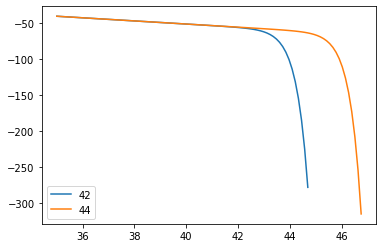

In [55]:
plt.clf()
ax = plt.gca()
# 42
ok42 = p_Ev_42 > 0.
ax.plot(lEval[ok42], np.log10(p_Ev_42[ok42]), label='42')
# 44
ok44 = p_Ev_44 > 0.
ax.plot(lEval[ok44], np.log10(p_Ev_44[ok44]), label='44')
#
#ax.set_ylim(-70., -40.)
#ax.set_xlim(39., 42.)
#
ax.legend()

In [56]:
p_Ev_42 / p_Ev_44

/tmp/ipykernel_4080641/1367843270.py:1: RuntimeWarning: invalid value encountered in true_divide
  p_Ev_42 / p_Ev_44


array([9.99999901e-001, 9.99999869e-001, 9.99999827e-001, 9.99999771e-001,
       9.99999698e-001, 9.99999600e-001, 9.99999472e-001, 9.99999302e-001,
       9.99999077e-001, 9.99998779e-001, 9.99998387e-001, 9.99997867e-001,
       9.99997180e-001, 9.99996273e-001, 9.99995073e-001, 9.99993486e-001,
       9.99991390e-001, 9.99988617e-001, 9.99984953e-001, 9.99980109e-001,
       9.99973705e-001, 9.99965240e-001, 9.99954049e-001, 9.99939256e-001,
       9.99919701e-001, 9.99893851e-001, 9.99859680e-001, 9.99814509e-001,
       9.99754800e-001, 9.99675872e-001, 9.99571544e-001, 9.99433646e-001,
       9.99251382e-001, 9.99010490e-001, 9.98692134e-001, 9.98271443e-001,
       9.97715585e-001, 9.96981249e-001, 9.96011329e-001, 9.94730600e-001,
       9.93040079e-001, 9.90809718e-001, 9.87868998e-001, 9.83994931e-001,
       9.78896949e-001, 9.72198230e-001, 9.63413218e-001, 9.51921664e-001,
       9.36940603e-001, 9.17497750e-001, 8.92413274e-001, 8.60302509e-001,
       8.19620323e-001, 7

### Cumulative

In [27]:
reload(zdm)

<module 'zdm.zdm' from '/data/Projects/FRB_Software/zdm/zdm/zdm.py'>

In [28]:
cum_Ev_42 = zdm.array_cum_gamma(Eval, Emin, 10**42, gamma)
cum_Ev_44 = zdm.array_cum_gamma(Eval, Emin, 10**44, gamma)

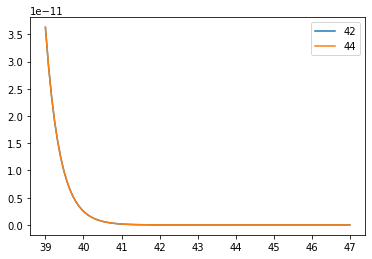

In [29]:
plt.clf()
ax = plt.gca()
# 42
ax.plot(lEval, cum_Ev_42, label='42')
# 44
ax.plot(lEval, cum_Ev_44, label='44')
#
#ax.set_ylim(-70., -40.)
#ax.set_xlim(39., 42.)
#
ax.legend()

In [32]:
cum_Ev_42 / cum_Ev_44

/tmp/ipykernel_4080641/272146299.py:1: RuntimeWarning: invalid value encountered in true_divide
  cum_Ev_42 / cum_Ev_44


array([0.99967045, 0.99959106, 0.99949255, 0.99937031, 0.99921861,
       0.99903037, 0.99879679, 0.99850693, 0.99814724, 0.9977009 ,
       0.99714704, 0.99645974, 0.99560687, 0.99454853, 0.99323522,
       0.99160551, 0.98958316, 0.98707357, 0.98395933, 0.98009473,
       0.97529895, 0.96934755, 0.96196197, 0.95279647, 0.94142185,
       0.92730534, 0.90978548, 0.88804095, 0.8610518 , 0.82755118,
       0.78596521, 0.73433799, 0.67023807, 0.59064147, 0.49178527,
       0.36898395, 0.21639824, 0.02674368, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        